In [138]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [67]:
random_state=42

In [68]:
data = []
category = []

In [69]:
for filename in os.scandir("./benign"):
    if filename.is_file():
        img = Image.open(filename.path)
        img = img.resize(size=(244,244))
        img = img.convert('L')
        data.append(np.array(img))
        category.append(0)
        del img

In [70]:
for filename in os.scandir("./malignant"):
    if filename.is_file():
        img = Image.open(filename.path)
        img = img.convert('L')
        img = img.resize(size=(244,244))
        data.append(np.array(img))
        category.append(1)
        del img

In [71]:
x,y = np.array(data),category

In [72]:
x.min(),x.max()

(0, 255)

Grey scale image is between 0-255, we can just divide by 255 to normalize

In [73]:
x=x/255

In [74]:
import keras
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.models import Sequential
from keras.keras.keras.layers import Dense, Activation, Flatten


In [75]:
from sklearn.model_selection import train_test_split 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

In [81]:

model=keras.Sequential([
keras.Input(shape=(244,244)),
keras.layers.Flatten(),
keras.layers.Dense(2048),
keras.layers.Activation("relu"),
keras.layers.Dense(1024),z
keras.layers.Activation(activation="relu"),
keras.layers.Dense(2),
keras.layers.Activation(activation="softmax")])


In [82]:
one_hot_y_train=pd.get_dummies(y_train)
one_hot_y_test=pd.get_dummies(y_test)

In [83]:
opt = tf.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = None

# START CODE HERE
epochs = 10
history=model.fit(X_train, one_hot_y_train,batch_size=32, epochs=epochs,validation_data= (X_test,one_hot_y_test))

Epoch 1/10
6/6 [==============================] - 2s 280ms/step - loss: 0.6876 - accuracy: 0.5815 - val_loss: 0.4608 - val_accuracy: 0.7660
Epoch 2/10
6/6 [==============================] - 1s 232ms/step - loss: 0.5691 - accuracy: 0.6902 - val_loss: 0.4819 - val_accuracy: 0.8085
Epoch 3/10
6/6 [==============================] - 1s 237ms/step - loss: 0.5409 - accuracy: 0.7391 - val_loss: 0.4199 - val_accuracy: 0.7234
Epoch 4/10
6/6 [==============================] - 1s 238ms/step - loss: 0.4785 - accuracy: 0.7772 - val_loss: 0.4754 - val_accuracy: 0.7660
Epoch 5/10
6/6 [==============================] - 1s 235ms/step - loss: 0.4459 - accuracy: 0.8152 - val_loss: 0.4660 - val_accuracy: 0.7660
Epoch 6/10
6/6 [==============================] - 1s 238ms/step - loss: 0.4277 - accuracy: 0.8261 - val_loss: 0.4533 - val_accuracy: 0.7872
Epoch 7/10
6/6 [==============================] - 1s 229ms/step - loss: 0.4426 - accuracy: 0.7880 - val_loss: 0.3917 - val_accuracy: 0.7660
Epoch 8/10
6/6 [====

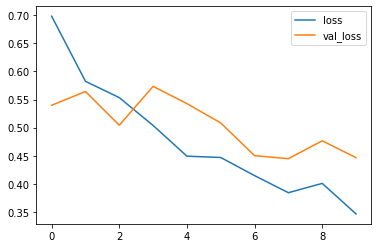

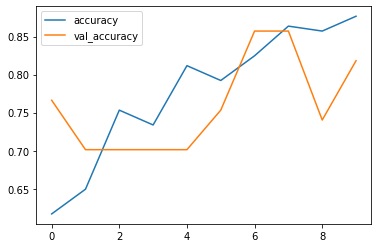

In [16]:
l1=plt.plot(history.history['loss'],label="loss")
l2=plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [17]:
preds=model.predict(X_test)

3/3 [==============================] - 0s 42ms/step


In [18]:
confidence=np.argsort([abs(preds[:,0]-preds[:,1])])

In [26]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [57]:
for i in confidence[0][:5]:
    curr=X_test[i].reshape(244,244)
    #print(y[i],preds[i])
    #plt.imshow(curr*255, cmap='gray', vmin=0, vmax=255)
    #plt.show()